## Libraries

In [10]:
import pandas as pd
import numpy as np

# preprocessing
from sklearn.model_selection import train_test_split

## Load Data


In [6]:
from src.load_data import load_data

file_path='../data/raw/flight_df (2).csv'

df = load_data(file_path)

# Select specified columns for app
selected_columns = [ 
    'Inflight wifi service',
    'Online boarding',
    'Age',
    'Flight Distance',
    'Baggage handling',
    'Checkin service',
    'Loyal Customer',
    'Seat comfort',
    'Business Travel',
    'Inflight entertainment',
    'satisfied'
]

# Filter the DataFrame to include only the selected columns
df = df[selected_columns]
df.head()

,Inflight wifi service,Online boarding,Age,Flight Distance,Baggage handling,Checkin service,Loyal Customer,Seat comfort,Business Travel,Inflight entertainment,satisfied
0,2,2,26,2062,3,3,1,2,1,2,0
1,5,4,52,680,4,4,1,4,1,4,1
2,3,3,28,188,4,4,1,3,0,3,0
3,3,4,54,453,3,4,1,4,1,3,0
4,4,4,40,775,3,3,1,4,1,4,0


## Model Validation

In [7]:
#define target
y=df['satisfied']
X=df.drop(columns='satisfied')

In [8]:
# save x new dataset for the app
new_dataset = X.to_csv('../data/transformed/_new_flight_df.csv', index=False)

In [11]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing and Pipeline

In [12]:
from src.preprocessing_pipeline import create_preprocessing_pipeline

preprocessor = create_preprocessing_pipeline()

In [14]:
from src.data_preprocessing import preprocess_and_rebalance_data

X_train_balanced, X_test_transformed, y_train_balanced = preprocess_and_rebalance_data(preprocessor, X_train, X_test, y_train)

#convert the preproessed data back into a dataframe

X_train_balanced_df = pd.DataFrame(X_train_balanced)
X_test_transformed_df = pd.DataFrame(X_test_transformed)

## Machine Learning

In [16]:
import lightgbm as lgb
from src.train_predict import train_and_predict_model

lgbm_model = lgb.LGBMClassifier(random_state=42, verbose=-1)

# Train the model on the preprocessed data and predict the target variable for the test set
train_preds, test_preds = train_and_predict_model(X_train_balanced_df, y_train_balanced, X_test_transformed_df, preprocessor, lgbm_model)

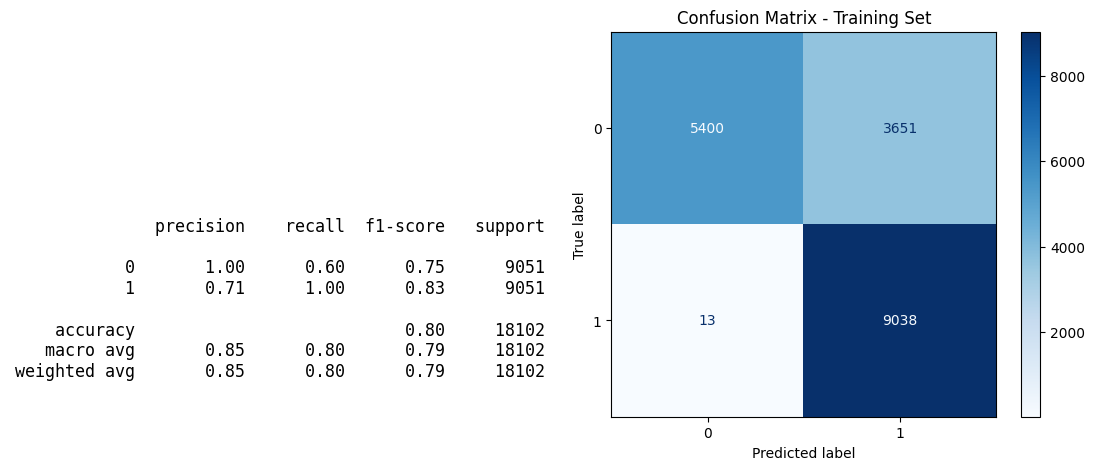

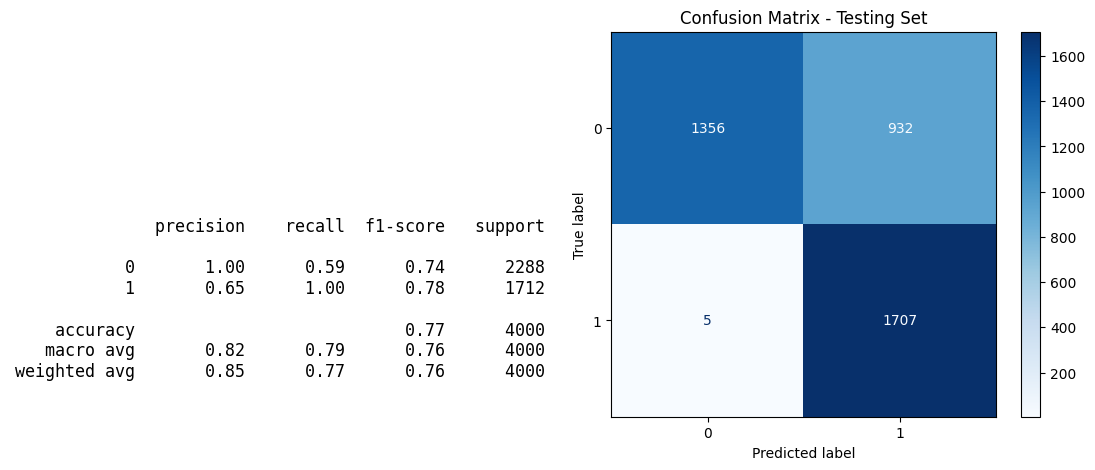

Model Saved to ../models/lgbm_model.joblib


In [20]:
from src.evaluate_model import evaluate_models, save_model

train_report, test_report = evaluate_models(lgbm_model, X_train_balanced_df, y_train_balanced, X_test_transformed_df, y_test)

#save the trained model to the models folder
model_path = '../models/lgbm_model.joblib'
save_model(lgbm_model, model_path)

In [25]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

# Train the model on the preprocessed data and predict the target variable for the test set
train_preds, test_preds = train_and_predict_model(X_train_balanced_df, y_train_balanced, X_test_transformed_df, preprocessor, dec_tree)

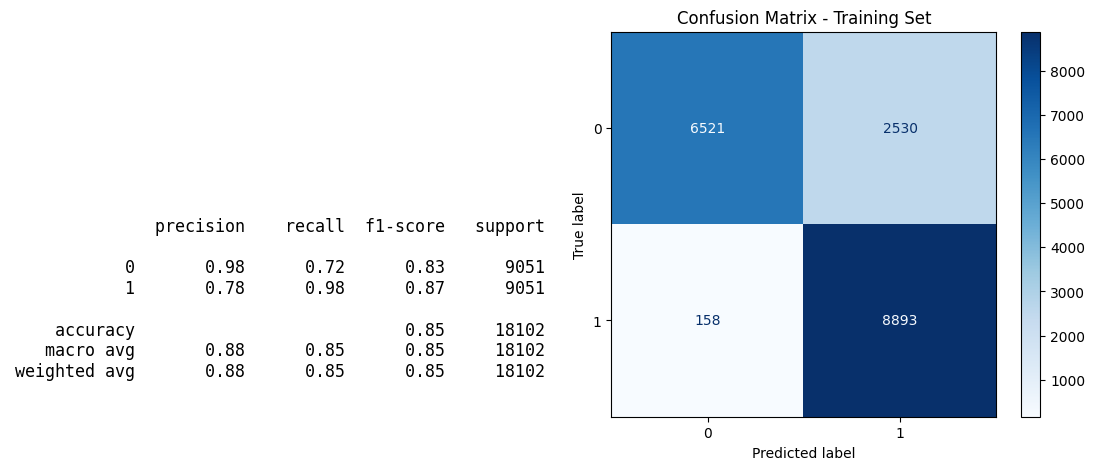

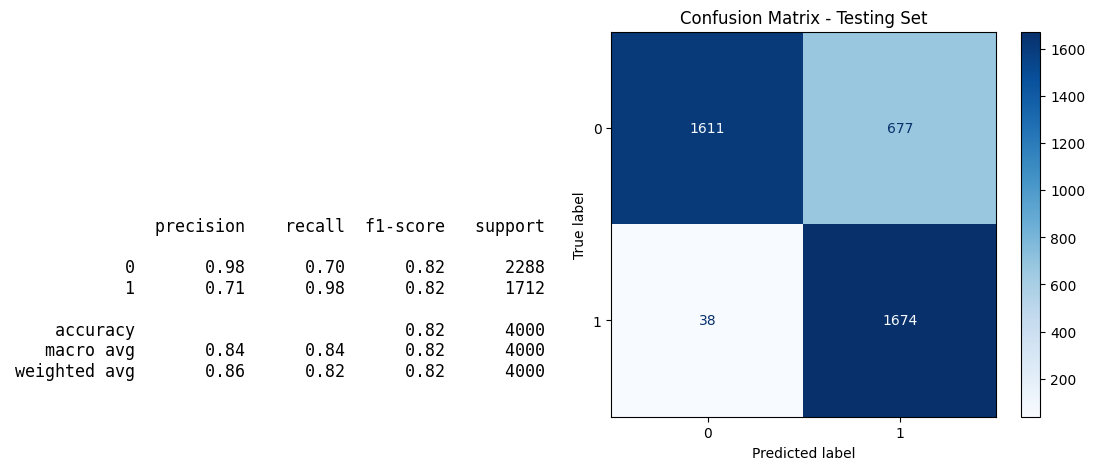

Model Saved to ../models/dec_tree.joblib


In [26]:
train_report, test_report = evaluate_models(dec_tree, X_train_balanced_df, y_train_balanced, X_test_transformed_df, y_test)

#save the trained model to the models folder
model_path = '../models/dec_tree.joblib'
save_model(dec_tree, model_path)

### Feature importance 